### Bear Classifier

Create our own dataset using google images and classify between teddy bear,
grizzly bear and black bear using Pytorch and fastai.

In this notebook we are creating our own dataset of teddy bear, black bear and grizzly bear and try to classify between them. We are going to use following javascript code to download the images from Google Images.

Javascript code:
```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [2]:
# Import the drive if you're using Google Colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [21]:
# Import the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [22]:
# Change directory for Google Colab
#cd drive/My\ Drive
#path = Path('bear_dataset')

# Or for your local system
path = Path('d:/Data/Testing/bear_dataset')

In [28]:
# Create directories
black = path/'black'
black.mkdir(parents=True, exist_ok=True)

teddy = path/'teddy'
teddy.mkdir(parents=True, exist_ok=True)

grizzly = path/'grizzly'
grizzly.mkdir(parents=True, exist_ok=True)

In [29]:
# Download images
download_images('urls/blackbear.txt', black, max_pics = 500)
download_images('urls/teddybear.txt', teddy, max_pics = 500)
download_images('urls/grizzlybear.txt', grizzly, max_pics = 500)

In [30]:
# Delete corrupted images
classes = ['black', 'grizzly', 'teddy']

for c in classes:
    print(c)
    # Resize image to (width or height) max_size 500 pixels
    verify_images(path/c, delete=True, max_size=500)

In [31]:
# Normalize data
data = ImageDataBunch.from_folder(
    path, train='.', valid_pct = 0.2, seed=66,
    ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

# View data
data.show_batch(rows=5, figsize=(10, 10))

c:\programs\python37\lib\site-packages\torch\cuda\__init__.py:132: UserWarning: 
    Found GPU0 GeForce GTX 760 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


RuntimeError: CUDA error: no kernel image is available for execution on the device

In [7]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['black', 'grizzly', 'teddy']
555
138


#Training

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [27]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,1.126316,0.415519,0.130435,00:11
1,0.678127,0.097153,0.021739,00:11
2,0.471867,0.087250,0.021739,00:11
3,0.357843,0.098199,0.021739,00:11
4,0.289627,0.109759,0.028986,00:11
5,0.244424,0.129275,0.021739,00:11
6,0.212294,0.131504,0.021739,00:11
7,0.181084,0.123393,0.021739,00:11
8,0.161418,0.121518,0.021739,00:11
9,0.144131,0.123101,0.021739,00:11


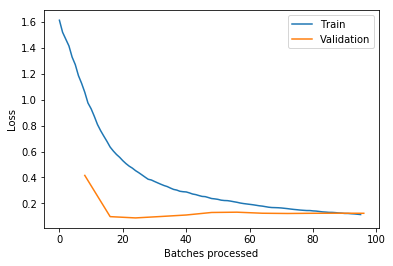

In [29]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


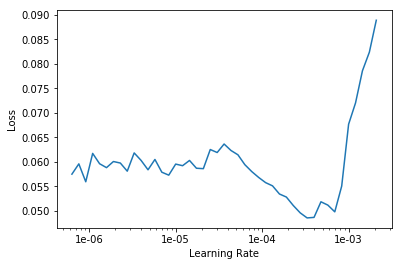

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.081498,0.162770,0.036232,00:11
1,0.084918,0.148371,0.043478,00:12
2,0.074237,0.146299,0.043478,00:12


This doesn't help much so we use the stage-1 training.

In [0]:
learn.save('stage-2')

#Interpretation

In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

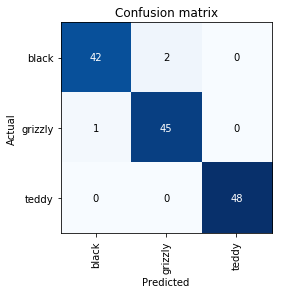

In [37]:
interp.plot_confusion_matrix()

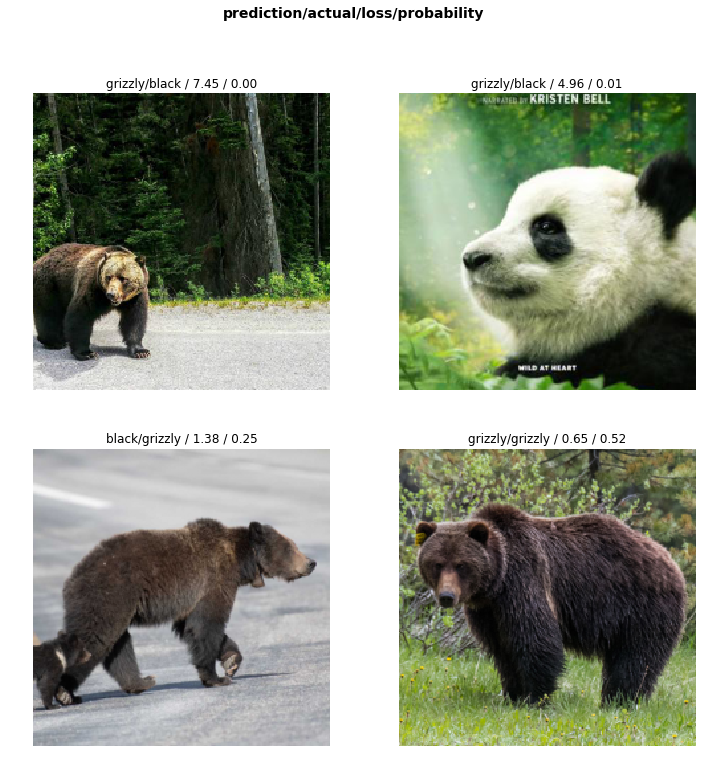

In [39]:
interp.plot_top_losses(k = 4, heatmap=False)

#Prediction

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn.export()

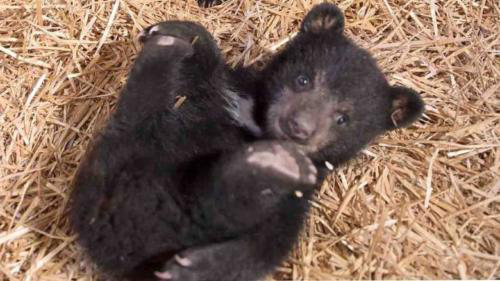

In [42]:
#example image
img = open_image(path/'black/00000066.jpeg')
img

In [0]:
learn = load_learner(path)

In [44]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  black
